In [18]:
job_data = {
    'job_id': [1, 2, 3, 4, 5],
    'job_title': ['Data Scientist', 'Software Engineer', 'Product Manager', 'Marketing Director', 'HR Manager'],
    'company_name': ['Google', 'Microsoft', 'Apple', 'Nike', 'Starbucks'],
    'job_location': ['Mountain View, CA', 'Redmond, WA', 'Cupertino, CA', 'Beaverton, OR', 'Seattle, WA']
}

company_data = {
    'company_name': ['Google', 'Microsoft', 'Apple', 'Nike', 'Starbucks'],
    'industry': ['Technology', 'Technology', 'Technology', 'Apparel', 'Food & Beverage'],
    'company_size': ['100,000+', '100,000+', '100,000+', '75,000+', '346,000+']
}

df_jobs = pd.DataFrame(job_data)
df_company = pd.DataFrame(company_data)

In [19]:
df_jobs

,job_id,job_title,company_name,job_location
0,1,Data Scientist,Google,"Mountain View, CA"
1,2,Software Engineer,Microsoft,"Redmond, WA"
2,3,Product Manager,Apple,"Cupertino, CA"
3,4,Marketing Director,Nike,"Beaverton, OR"
4,5,HR Manager,Starbucks,"Seattle, WA"


In [5]:
df_company

,company_name,industry,company_size
0,Google,Technology,"100,000+"
1,Microsoft,Technology,"100,000+"
2,Apple,Technology,"100,000+"
3,Nike,Apparel,"75,000+"
4,Starbucks,Food & Beverage,"346,000+"


In [6]:
df_jobs.merge(df_company, on='company_name')

,job_id,job_title,company_name,job_location,industry,company_size
0,1,Data Scientist,Google,"Mountain View, CA",Technology,"100,000+"
1,2,Software Engineer,Microsoft,"Redmond, WA",Technology,"100,000+"
2,3,Product Manager,Apple,"Cupertino, CA",Technology,"100,000+"
3,4,Marketing Director,Nike,"Beaverton, OR",Apparel,"75,000+"
4,5,HR Manager,Starbucks,"Seattle, WA",Food & Beverage,"346,000+"


In [17]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

#Loading data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#data cleaning
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

In [8]:
df_US = df[df['job_country'] == 'United States'].copy()
df_US['job_posted_month'] = df_US['job_posted_date'].dt.strftime('%B')
df_US_pivot = df_US.pivot_table(index='job_posted_month', columns='job_title_short', aggfunc='size')
df_US_pivot = df_US_pivot.reset_index()
df_US_pivot['job_posted_month_no'] = pd.to_datetime(df_US_pivot['job_posted_month'], format='%B').dt.month
df_US_pivot = df_US_pivot.sort_values('job_posted_month_no')
df_US_pivot = df_US_pivot.set_index('job_posted_month')
df_US_pivot = df_US_pivot.drop(columns='job_posted_month_no')

df_US_pivot

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_posted_month,,,,,,,,,,
January,527,36,8494,2655,6915,60,1544,773,1552,114
February,447,24,6124,3060,4956,56,1258,878,1127,90
March,438,19,6218,3183,4779,59,1114,829,1150,115
April,565,40,6049,2801,4867,51,1025,781,991,112
May,279,20,4993,2976,4377,49,839,746,914,90
June,446,32,5683,2893,4645,48,1009,812,1033,93
July,581,39,5201,2570,4876,65,883,747,1095,153
August,903,39,6634,3269,6318,68,1186,903,1515,194
September,897,50,4639,3224,4568,113,805,775,1014,228


In [9]:
df_us_software_pivot = pd.read_csv('https://lukeb.co/software_csv').set_index('job_posted_month')
df_us_software_pivot

,Front-End Developer,Back-End Developer,Full-Stack Developer,UI/UX Designer
job_posted_month,,,,
January,13619,9827,5108,4348
February,11456,9116,7298,4284
March,11102,8178,5814,4159
April,14037,9209,7232,4220
May,12126,8864,6718,4980
June,12003,8065,5902,4781
July,11914,8061,6839,4344
August,11571,8191,7413,4104
September,14016,8447,6139,4094


In [10]:
df_us_merged = df_US_pivot.merge(df_us_software_pivot, on='job_posted_month')
df_us_merged

,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer,Front-End Developer,Back-End Developer,Full-Stack Developer,UI/UX Designer
job_posted_month,,,,,,,,,,,,,,
January,527,36,8494,2655,6915,60,1544,773,1552,114,13619,9827,5108,4348
February,447,24,6124,3060,4956,56,1258,878,1127,90,11456,9116,7298,4284
March,438,19,6218,3183,4779,59,1114,829,1150,115,11102,8178,5814,4159
April,565,40,6049,2801,4867,51,1025,781,991,112,14037,9209,7232,4220
May,279,20,4993,2976,4377,49,839,746,914,90,12126,8864,6718,4980
June,446,32,5683,2893,4645,48,1009,812,1033,93,12003,8065,5902,4781
July,581,39,5201,2570,4876,65,883,747,1095,153,11914,8061,6839,4344
August,903,39,6634,3269,6318,68,1186,903,1515,194,11571,8191,7413,4104
September,897,50,4639,3224,4568,113,805,775,1014,228,14016,8447,6139,4094


In [11]:
top_5 = (df_us_merged
         .sum() # counting houw many times the skills are appearing
         .sort_values(ascending=False) # sorted the skills according to the maximum number of times they are coming
         .head() # get the top 5 skills
         .index #get the index of top 5
         .tolist()
         )
top_5

['Front-End Developer',
 'Back-End Developer',
 'Full-Stack Developer',
 'Data Analyst',
 'Data Scientist']

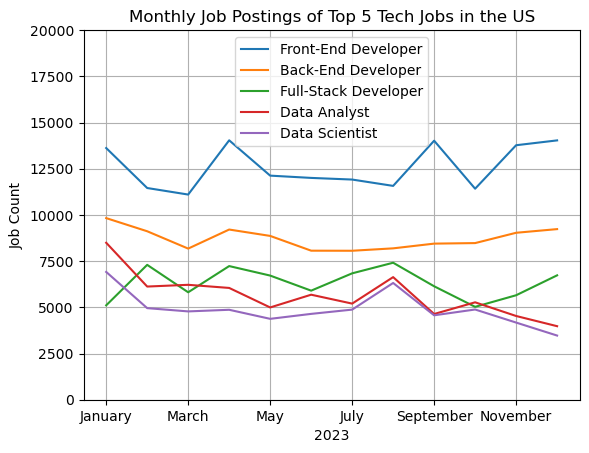

In [12]:
df_us_merged[top_5].plot(kind='line')
plt.grid(True)
plt.title('Monthly Job Postings of Top 5 Tech Jobs in the US')
plt.xlabel('2023')
plt.ylabel('Job Count')
plt.ylim(0, 20000)
plt.legend()
plt.show()

# Another Example

In [13]:
#filtering by data analysts
df_da = df[df['job_title_short'] == 'Data Analyst'].copy()
df_da

# creating a column for month
df_da['month'] = df_da['job_posted_date'].dt.month
df_da

# Pivot table to count job postings by month
df_da_pivot = df_da.pivot_table(index='month', aggfunc='count')['job_title_short']
df_da_pivot

month
1     23585
2     16558
3     16243
4     15514
5     13423
6     16008
7     16095
8     18628
9     14969
10    16239
11    15230
12    13583
Name: job_title_short, dtype: int64

In [16]:
# filtering for senior data analyst
df_sda = df[df['job_title'] == 'Senior Data Analyst']
df_sda

# creating a column for month
df_sda['month'] = df['job_posted_date'].dt.month
df_sda

# pivot table to count job postings by month
df_sda_pivot = df_sda.pivot_table(index='month', aggfunc='count')['job_title_short']
df_sda_pivot

/var/folders/zm/92qn2sf553961xt_nm0z1fdc0000gn/T/ipykernel_8301/2892955207.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sda['month'] = df['job_posted_date'].dt.month


month
1     1063
2      805
3      679
4      651
5      580
6      692
7      640
8      754
9      576
10     628
11     616
12     525
Name: job_title_short, dtype: int64

In [15]:
# merging the two pivot tables
merged_da_pivot = pd.merge(df_da_pivot, df_sda_pivot, how='outer', left_index=True, right_index=True, )
merged_da_pivot.columns = ['DA_count', 'SDA_count']
merged_da_pivot

,DA_count,SDA_count
month,,
1,23585,1063
2,16558,805
3,16243,679
4,15514,651
5,13423,580
6,16008,692
7,16095,640
8,18628,754
9,14969,576


# homework

# 🟩 Merge US Jobs and Monthly Postings (2.7.1)

In [30]:
df_US_Merged = df_US.merge(df_US_pivot, how='left', on='job_posted_month')
df_US_Merged

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,...,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,...,446,32,5683,2893,4645,48,1009,812,1033,93
1,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,...,581,39,5201,2570,4876,65,883,747,1095,153
2,Data Engineer,GCP Data Engineer,Anywhere,via ZipRecruiter,Contractor and Temp work,True,Georgia,2023-11-07 14:01:59,False,False,...,719,36,4531,2793,4175,132,656,684,816,194
3,Senior Data Engineer,Senior Data Engineer - GCP Cloud,"Dearborn, MI",via LinkedIn,Full-time,False,"Florida, United States",2023-03-27 13:18:18,False,False,...,438,19,6218,3183,4779,59,1114,829,1150,115
4,Data Scientist,Data Scientist II,Anywhere,via ZipRecruiter,Full-time,True,"New York, United States",2023-04-23 13:02:57,False,False,...,565,40,6049,2801,4867,51,1025,781,991,112
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206287,Data Scientist,Asset Management Data Scientist,"New York, NY",via Trabajo.org,Full-time,False,"New York, United States",2023-10-16 06:01:53,True,False,...,932,48,5271,3015,4882,101,871,672,987,219
206288,Data Analyst,Data Analyst,"Indianapolis, IN",via Trabajo.org,Full-time,False,"Illinois, United States",2023-07-16 06:01:27,True,False,...,581,39,5201,2570,4876,65,883,747,1095,153
206289,Data Scientist,Data Scientist- Hybrid Work Location,"Dayton, OH",via Ai-Jobs.net,Full-time,False,"Illinois, United States",2023-04-21 06:02:31,False,True,...,565,40,6049,2801,4867,51,1025,781,991,112
206290,Data Analyst,Data Analyst - CRYPTOGRAPHY - Full-time,Anywhere,via Snagajob,Full-time,True,"Texas, United States",2023-01-28 06:02:55,True,False,...,527,36,8494,2655,6915,60,1544,773,1552,114


# 🟨 Merge Non-Remote Jobs and Salary (2.7.2)

In [31]:
df.head()

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"['r', 'python', 'sql', 'nosql', 'power bi', 't...","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,None,NaN,NaN,ALPHA Augmented Services,"['python', 'sql', 'c#', 'azure', 'airflow', 'd...","{'analyst_tools': ['dax'], 'cloud': ['azure'],..."
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"['python', 'c++', 'java', 'matlab', 'aws', 'te...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
4,Data Engineer,Data Engineer- Sr Jobs,"Washington, DC",via Clearance Jobs,Full-time,False,Sudan,2023-08-07 14:29:36,False,False,Sudan,None,NaN,NaN,Kristina Daniel,"['bash', 'python', 'oracle', 'aws', 'ansible',...","{'cloud': ['oracle', 'aws'], 'other': ['ansibl..."


In [33]:
df_non_remote = df[df['job_work_from_home'] == False].copy()
df_non_remote

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"['r', 'python', 'sql', 'nosql', 'power bi', 't...","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,None,NaN,NaN,ALPHA Augmented Services,"['python', 'sql', 'c#', 'azure', 'airflow', 'd...","{'analyst_tools': ['dax'], 'cloud': ['azure'],..."
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"['python', 'c++', 'java', 'matlab', 'aws', 'te...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
4,Data Engineer,Data Engineer- Sr Jobs,"Washington, DC",via Clearance Jobs,Full-time,False,Sudan,2023-08-07 14:29:36,False,False,Sudan,None,NaN,NaN,Kristina Daniel,"['bash', 'python', 'oracle', 'aws', 'ansible',...","{'cloud': ['oracle', 'aws'], 'other': ['ansibl..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785736,Software Engineer,DevOps Engineer,Singapura,melalui Trabajo.org,Pekerjaan tetap,False,Singapore,2023-03-13 06:16:16,False,False,Singapore,None,NaN,NaN,CAREERSTAR INTERNATIONAL PTE. LTD.,"['bash', 'python', 'perl', 'linux', 'unix', 'k...","{'os': ['linux', 'unix'], 'other': ['kubernete..."
785737,Data Analyst,CRM Data Analyst,"Bad Rodach, Jerman",melalui BeBee Deutschland,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,None,NaN,NaN,HABA FAMILYGROUP,"['sas', 'sas', 'sql', 'excel']","{'analyst_tools': ['sas', 'excel'], 'programmi..."
785738,Business Analyst,Commercial Analyst - Start Now,Malaysia,melalui Ricebowl,Pekerjaan tetap,False,Malaysia,2023-03-12 06:32:36,False,False,Malaysia,None,NaN,NaN,Lendlease Corporation,"['powerpoint', 'excel']","{'analyst_tools': ['powerpoint', 'excel']}"
785739,Data Engineer,"Principal Associate, Data Engineer (Remote-Eli...","Newark, New Jersey, Amerika Serikat",melalui Recruit.net,Pekerjaan tetap,False,Sudan,2023-03-12 06:32:15,False,False,Sudan,None,NaN,NaN,Capital One,"['python', 'go', 'nosql', 'sql', 'mongo', 'she...","{'cloud': ['aws', 'snowflake', 'azure', 'redsh..."


In [34]:
df_salary = df_non_remote.pivot_table(index='job_title_short', values='salary_year_avg', aggfunc='median')
df_salary

,salary_year_avg
job_title_short,
Business Analyst,85000.0
Cloud Engineer,89100.0
Data Analyst,90000.0
Data Engineer,125000.0
Data Scientist,125000.0
Machine Learning Engineer,104668.0
Senior Data Analyst,111175.0
Senior Data Engineer,147500.0
Senior Data Scientist,152650.0


In [37]:
df_salary_merged = df_non_remote.merge(df_salary, on='job_title_short', how='left')
df_salary_merged

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg_x,salary_hour_avg,company_name,job_skills,job_type_skills,salary_year_avg_y
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None,147500.0
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"['r', 'python', 'sql', 'nosql', 'power bi', 't...","{'analyst_tools': ['power bi', 'tableau'], 'pr...",90000.0
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,None,NaN,NaN,ALPHA Augmented Services,"['python', 'sql', 'c#', 'azure', 'airflow', 'd...","{'analyst_tools': ['dax'], 'cloud': ['azure'],...",125000.0
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"['python', 'c++', 'java', 'matlab', 'aws', 'te...","{'cloud': ['aws'], 'libraries': ['tensorflow',...",125000.0
4,Data Engineer,Data Engineer- Sr Jobs,"Washington, DC",via Clearance Jobs,Full-time,False,Sudan,2023-08-07 14:29:36,False,False,Sudan,None,NaN,NaN,Kristina Daniel,"['bash', 'python', 'oracle', 'aws', 'ansible',...","{'cloud': ['oracle', 'aws'], 'other': ['ansibl...",125000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
716184,Software Engineer,DevOps Engineer,Singapura,melalui Trabajo.org,Pekerjaan tetap,False,Singapore,2023-03-13 06:16:16,False,False,Singapore,None,NaN,NaN,CAREERSTAR INTERNATIONAL PTE. LTD.,"['bash', 'python', 'perl', 'linux', 'unix', 'k...","{'os': ['linux', 'unix'], 'other': ['kubernete...",95000.0
716185,Data Analyst,CRM Data Analyst,"Bad Rodach, Jerman",melalui BeBee Deutschland,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,None,NaN,NaN,HABA FAMILYGROUP,"['sas', 'sas', 'sql', 'excel']","{'analyst_tools': ['sas', 'excel'], 'programmi...",90000.0
716186,Business Analyst,Commercial Analyst - Start Now,Malaysia,melalui Ricebowl,Pekerjaan tetap,False,Malaysia,2023-03-12 06:32:36,False,False,Malaysia,None,NaN,NaN,Lendlease Corporation,"['powerpoint', 'excel']","{'analyst_tools': ['powerpoint', 'excel']}",85000.0
716187,Data Engineer,"Principal Associate, Data Engineer (Remote-Eli...","Newark, New Jersey, Amerika Serikat",melalui Recruit.net,Pekerjaan tetap,False,Sudan,2023-03-12 06:32:15,False,False,Sudan,None,NaN,NaN,Capital One,"['python', 'go', 'nosql', 'sql', 'mongo', 'she...","{'cloud': ['aws', 'snowflake', 'azure', 'redsh...",125000.0


# 🟨 Merge Company Salary and Remote Count (2.7.3)

In [44]:
df_remote_counts = df[df['job_work_from_home'] == True]
df_company_salary = df_remote_counts.pivot_table(index='company_name', values='salary_year_avg', aggfunc='median').reset_index()
df_company_salary

,company_name,salary_year_avg
0,0nward Select,92500.000000
1,1 Point System,137290.484375
2,1 Point System LLC.,170000.000000
3,1872 Consulting,146250.000000
4,24 Seven Talent,65000.000000
...,...,...
1560,pulseData,97500.000000
1561,starryai,105000.000000
1562,theSkimm,110000.000000
1563,vidIQ,85000.000000


In [43]:
df_company_merged = df_company_salary.merge(df_remote_counts, on='company_name', how='inner')
df_company_merged

,company_name,salary_year_avg_x,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg_y,salary_hour_avg,job_skills,job_type_skills
0,0nward Select,92500.000000,Data Analyst,Data Analyst [70649],Anywhere,via LinkedIn,Full-time,True,"New York, United States",2023-02-24 21:00:39,False,False,United States,year,92500.000000,NaN,"['javascript', 'html', 'sql', 'excel', 'sharep...","{'analyst_tools': ['excel', 'sharepoint'], 'as..."
1,1 Point System,137290.484375,Data Engineer,Data Engineer,Anywhere,via Indeed,Full-time,True,"California, United States",2023-01-09 19:07:16,True,False,United States,year,137290.484375,NaN,"['python', 'scala', 'java', 'sql', 'aws', 'air...","{'analyst_tools': ['ssis'], 'cloud': ['aws'], ..."
2,1 Point System LLC.,170000.000000,Data Engineer,Data Science Engineer,Anywhere,via Indeed,Full-time,True,"California, United States",2023-06-12 21:02:50,False,False,United States,year,170000.000000,NaN,"['python', 'sql', 'postgresql', 'kafka', 'pyto...","{'databases': ['postgresql'], 'libraries': ['k..."
3,1872 Consulting,146250.000000,Data Scientist,Data Scientist,Anywhere,via LinkedIn,Full-time,True,Sudan,2023-08-16 16:12:12,False,False,Sudan,year,145000.000000,NaN,"['sas', 'sas', 'python', 'java']","{'analyst_tools': ['sas'], 'programming': ['sa..."
4,1872 Consulting,146250.000000,Data Engineer,Sr Data Engineer,Anywhere,via LinkedIn,Full-time,True,"California, United States",2023-05-09 19:19:42,True,False,United States,year,147500.000000,NaN,"['nosql', 'azure', 'spark']","{'cloud': ['azure'], 'libraries': ['spark'], '..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13393,theSkimm,110000.000000,Data Engineer,Staff Data Engineer,Anywhere,via Startup Jobs,Full-time,True,"Florida, United States",2023-07-08 12:09:19,True,True,United States,None,NaN,NaN,"['aws', 'redshift', 'spark', 'airflow', 'looke...","{'analyst_tools': ['looker'], 'cloud': ['aws',..."
13394,vidIQ,85000.000000,Data Engineer,Data Engineer,Anywhere,via LinkedIn,Full-time,True,"Texas, United States",2023-05-06 08:08:36,False,False,United States,None,NaN,NaN,"['go', 'python', 'dynamodb', 'aws', 'numpy', '...","{'cloud': ['aws'], 'databases': ['dynamodb'], ..."
13395,vidIQ,85000.000000,Machine Learning Engineer,Machine Learning Engineer,Anywhere,via EchoJobs,Full-time,True,Poland,2023-02-01 21:57:29,False,False,Poland,year,85000.000000,NaN,"['go', 'python', 'nosql', 'postgresql', 'dynam...","{'databases': ['postgresql', 'dynamodb'], 'lib..."
13396,zenapse,187500.000000,Data Engineer,Data Engineer,Anywhere,via LinkedIn,Full-time,True,"Florida, United States",2023-03-07 14:34:58,True,False,United States,year,187500.000000,NaN,"['neo4j', 'kafka']","{'databases': ['neo4j'], 'libraries': ['kafka']}"
